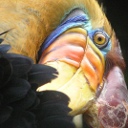

Enter the value of k (number of cluster): 6
[[190. 185. 194.]
 [ 65. 139. 187.]
 [ 20.  29.  26.]
 [ 48.  38.  44.]
 [ 95. 171. 253.]
 [105. 212. 228.]]


[[135. 129. 134.]
 [ 76.  76.  84.]
 [ 32.  27.  18.]
 [ 41.  32.  34.]
 [103.  96.  98.]
 [103. 116. 110.]]


[[103. 116. 110.]
 [ 41.  47.  60.]
 [ 18.  18.  16.]
 [ 32.  34.  33.]
 [ 89.  83.  92.]
 [ 68.  68.  66.]]


[[103. 116. 110.]
 [ 32.  36.  33.]
 [ 18.  18.  16.]
 [ 34.  33.  32.]
 [ 60.  51.  59.]
 [ 41.  47.  60.]]


[[103. 116. 110.]
 [ 34.  33.  29.]
 [ 18.  18.  16.]
 [ 32.  27.  21.]
 [ 47.  60.  60.]
 [ 41.  32.  36.]]


[[103. 116. 110.]
 [ 32.  27.  29.]
 [ 18.  18.  16.]
 [ 21.  22.  23.]
 [ 41.  32.  36.]
 [ 34.  33.  32.]]


[[103. 116. 110.]
 [ 27.  24.  25.]
 [ 16.  14.  15.]
 [ 18.  18.  21.]
 [ 41.  32.  34.]
 [ 33.  32.  29.]]


[[103. 116. 110.]
 [ 21.  22.  24.]
 [ 14.  15.  13.]
 [ 18.  18.  16.]
 [ 41.  32.  34.]
 [ 32.  27.  29.]]


[[103. 116. 110.]
 [ 18.  18.  21.]
 [ 13.  14.  15.]
 [ 16.  14.  1

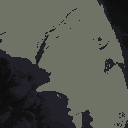

In [214]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from google.colab.patches import cv2_imshow
import random as rnd

############################################################################

#Custom function for calculating Eucleadian distance between two pixel points
def calc_dist(x,y):
  x = x.flatten()
  y = y.flatten()
  sum = 0
  for i in range(3):
    if(x[i]>=y[i]):
      temp = x[i]-y[i]
    else:
      temp = y[i]-x[i]
    sum = sum + temp**2
  return np.sqrt(sum)

def calc_avg(x,len):
  x = x/len
  s = np.zeros(3)
  for i in range(len):
    s[0] = s[0]+x[0][0]
    s[1] = s[1]+x[1][0]
    s[2] = s[2]+x[2][0]
  return s


##############################################################################

#Read and visualize the image
img = cv2.imread("input.png")  
height, width, channels = np.shape(img)
cv2_imshow(img)

#Take number of clusters k as input
k = int(input("Enter the value of k (number of cluster): "))
#k = 4
iterations = 10

centroid = np.zeros((k,channels))

#Do random initialization of k centroids from among the pixels available
temp_img = img.reshape(height*width,channels)
for i in range(k):
  centroid[i] = rnd.choice(temp_img)
print(centroid)
print('\n')

final_assigned_cluster = np.zeros((height, width))
##############################################################################
for it in range(iterations):
  #Cluster assignment
  assigned_cluster = np.zeros((height, width))
  for r in range(height):  
    for c in range(width): 
      current_pixel = img[r][c] # Read the pixel at location (r,c)
      temp_dist = np.zeros(k)
      for m in range(k):
        temp_dist[m] = calc_dist(centroid[m],current_pixel)
      assigned_cluster[r][c] = np.argmin(temp_dist)
  final_assigned_cluster = assigned_cluster
  assigned_cluster = assigned_cluster.flatten()

  #shift centroid
  for n in range(k):
    res = np.where(assigned_cluster==n)
    len = np.size(res[0])
    pixels_in_cluster = temp_img[res[0]]
    centroid[n] = calc_avg(pixels_in_cluster,len)
  print(centroid)
  print('\n')

final_assigned_cluster = final_assigned_cluster.astype(int)
#print(final_assigned_cluster)

for rr in range(height):  
  for cc in range(width): 
    img[rr][cc] = centroid[final_assigned_cluster[rr][cc]]
cv2_imshow(img)